# eeglab data sample 1

In [1]:
%matplotlib inline

import mne
import os.path as op
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

from mne.time_frequency import tfr_morlet, psd_multitaper
from mne.connectivity import spectral_connectivity

In [30]:
plt.style.use('ggplot')

In [13]:
ls

Eeglab_data.set                   motor-imagery-decoding-csp.ipynb
Untitled.ipynb                    readme.md
event-related-potentials.ipynb


- read raw `.set` files

> `mne.io.read_raw_eeglab(input_fname, montage=None, eog=(), event_id=None,
                            preload=False, verbose=None, uint16_codec=None)`

- read epoched `.set` files

> `mne.read_epochs_eeglab(input_fname, events=None, event_id=None, montage=None, eog=(), verbose=None, uint16_codec=None)`

#### 標準10-20の確認

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 93 unique labels.


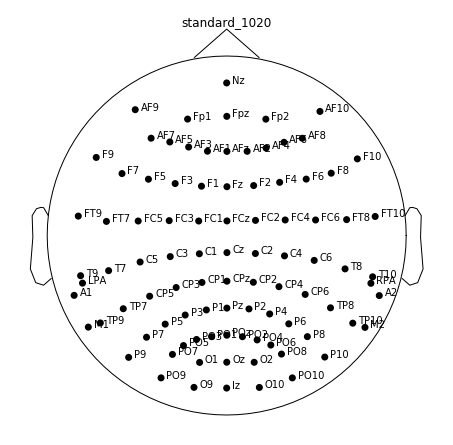

['LPA', 'RPA', 'Nz', 'Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']


In [44]:
mont=mne.channels.read_montage('standard_1020')
mont.plot()
print(mont.ch_names)

In [40]:
raw = mne.io.read_raw_eeglab("Eeglab_data.set", montage=None, eog="auto")

Events like the following will be dropped entirely: ['rt', 'square'], 2 in total
154/154 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
As is, the trigger channel will consist entirely of zeros.
Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file


<ipython-input-40-6b6454869146>:1: RuntimeWarning: Events like the following will be dropped entirely: ['rt', 'square'], 2 in total
  raw = mne.io.read_raw_eeglab("Eeglab_data.set", montage=None, eog="auto")
<ipython-input-40-6b6454869146>:1: RuntimeWarning: 154/154 event codes could not be mapped to integers. Use the 'event_id' parameter to map such events manually.
  raw = mne.io.read_raw_eeglab("Eeglab_data.set", montage=None, eog="auto")
<ipython-input-40-6b6454869146>:1: RuntimeWarning: As is, the trigger channel will consist entirely of zeros.
  raw = mne.io.read_raw_eeglab("Eeglab_data.set", montage=None, eog="auto")
<ipython-input-40-6b6454869146>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab("Eeglab_data.set", montage=None, eog="auto")


In [41]:
print(raw.info)
print(raw.ch_names)

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | EEG 000, EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, ...
    chs : list | 33 items (EEG: 32, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 64.0 Hz
    nchan : int | 33
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 128.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : N

- Raw Data Plotting

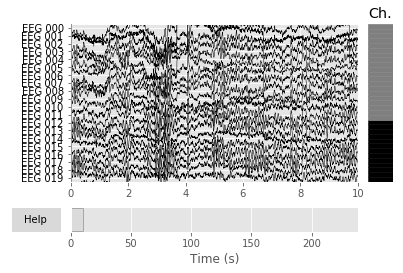

matplotlib.figure.Figure

In [36]:
fig = raw.plot(block=True, lowpass=40)
type(fig)

/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/mne/selection.py:184: RuntimeWarning: invalid value encountered in less
  left = lobe[np.where(x[lobe] < median)[0]]
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/mne/selection.py:185: RuntimeWarning: invalid value encountered in greater
  right = lobe[np.where(x[lobe] > median)[0]]
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/scipy/stats/stats.py:2242: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis)
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/atsuya/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/numpy/core/fromnumer

RuntimeError: No digitization points found.

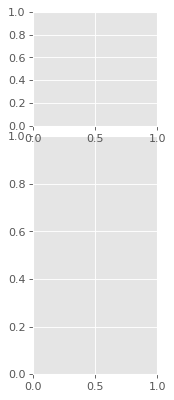

In [38]:
raw.plot(butterfly=True, group_by='position')